# Will it Rain?

Data sourced from : https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt  
import seaborn as sns

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.loc[data.RainTomorrow == 'No', 'RainTomorrow'] = 0
data.loc[data.RainTomorrow == 'Yes', 'RainTomorrow'] = 1
data.loc[data.RainToday == 'No', 'RainToday'] = 0
data.loc[data.RainToday == 'Yes', 'RainToday'] = 1

In [ ]:
cleansun = data.Sunshine.notna()& data.RainToday.notna()
datacleansun = (data.loc[cleansun])

rain = datacleansun.RainToday
sun = datacleansun.Sunshine

plt.hist(sun[rain==0], bins=np.linspace(0, 20, 21), label="No Rain", density=True, histtype = 'step')
plt.hist(sun[rain==1], bins=np.linspace(0, 20, 21), label="Rain", density=True, histtype = 'step' )
plt.legend()
plt.show()

In [210]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0


In [211]:
data.shape

(142193, 24)

In [174]:
data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

## Determining importance of features

### Clean individual features of nan

In [372]:
numdataX = data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am','WindDir3pm', 'RISK_MM','RainToday','RainTomorrow'], axis=1)
numdataX_shape = numdataX.shape
n_numX = numdataX_shape[1]

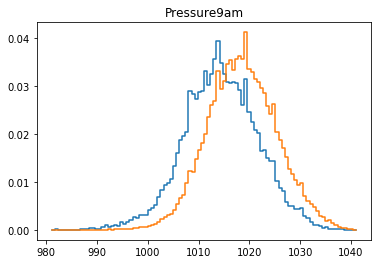

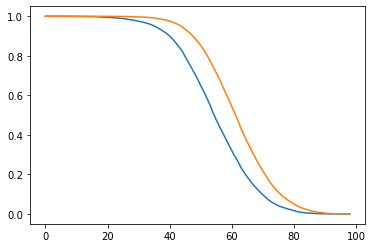

0.6629917874773262 Pressure9am


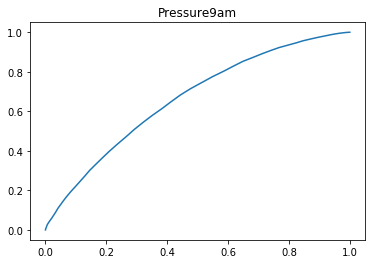

('ROC area', 0.6629917874773262, 'Pressure9am')

In [404]:
mtot = data.shape[0]

raintomorrow = data.RainTomorrow


def rain_norain_ROC(feature, key):
    feat_arr = np.asarray(feature)
    feat_arr = feat_arr[np.logical_not(np.isnan(feat_arr))]
    rain = np.asarray([feature[raintomorrow==1]])
    notrain = np.asarray([feature[raintomorrow==0]])

    rain = rain[np.logical_not(np.isnan(rain))]
    notrain = notrain[np.logical_not(np.isnan(notrain))]
   
    x = np.linspace(feat_arr.min(), feat_arr.max(), 100)

    y_rain, x_rain = np.histogram(rain , bins= x)
    y_rain = y_rain/np.sum(y_rain)
    y_notrain, x_notrain = np.histogram(notrain , bins= x)
    y_notrain = y_notrain/np.sum(y_notrain)
    plt.title(str(key))
    plt.step(x_rain[1:], y_rain)
    plt.step(x_notrain[1:], y_notrain)
    plt.show()
    
    rain_sum = np.cumsum(y_rain)
    notrain_sum = np.cumsum(y_notrain)
    
    s = 1-rain_sum
    b = 1-notrain_sum
    
    plt.plot(s)
    plt.plot(b)
    plt.show()
   # print(s, b)
    area = np.trapz(rain_sum,  notrain_sum)
    print(area, str(key))
    plt.title(str(key))
    plt.plot(s,b)
    plt.show()
    return 'ROC area' , area, key

rain_norain_ROC(numdataX.Pressure9am, 'Pressure9am')

In [383]:
def allROC(dataset):
    #ROCvsNaN = np.series
    for k,v in dataset.iteritems():
        ROC = rain_norain_ROC(v, k)
        numofnan = v.isna().sum()
    return(ROC, numofnan)
   

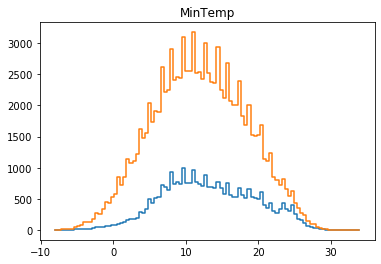

1925765929.5 MinTemp


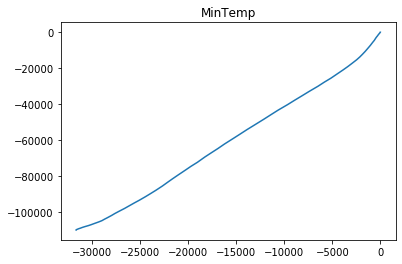

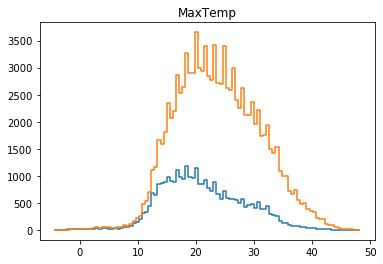

1366237188.5 MaxTemp


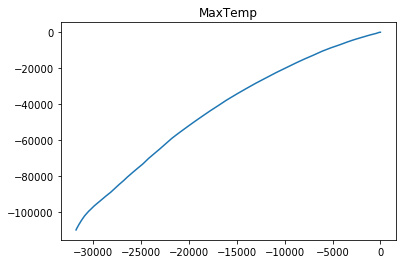

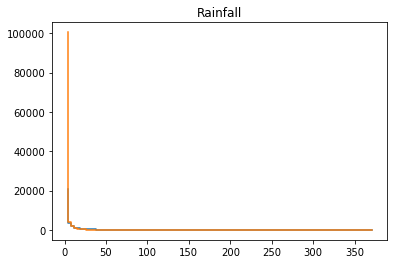

1077641561.0 Rainfall


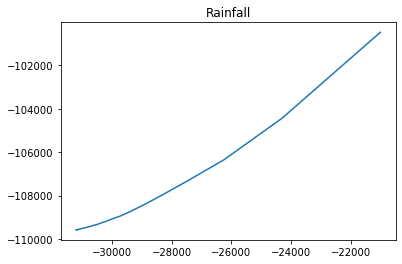

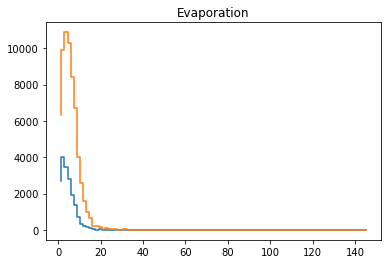

451839450.5 Evaporation


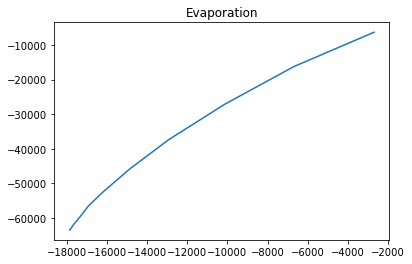

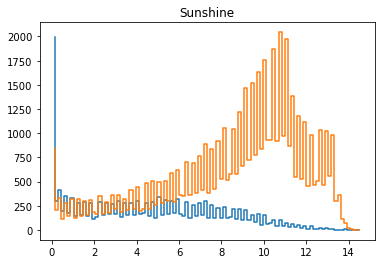

190345258.5 Sunshine


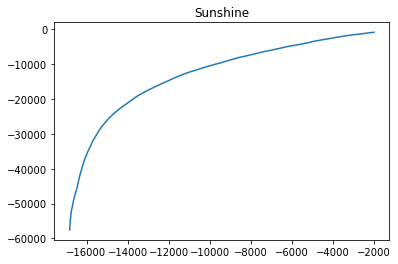

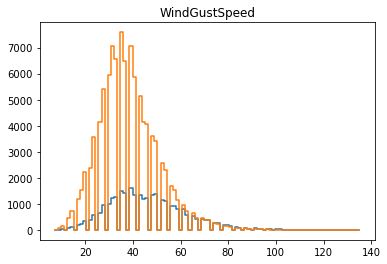

1972285071.0 WindGustSpeed


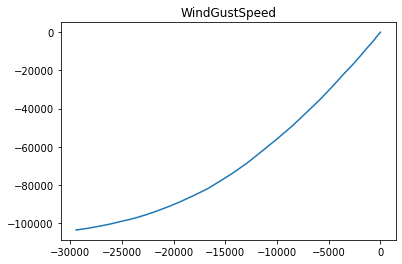

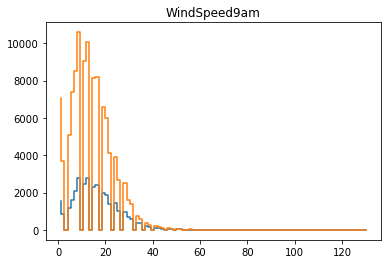

1912000311.5 WindSpeed9am


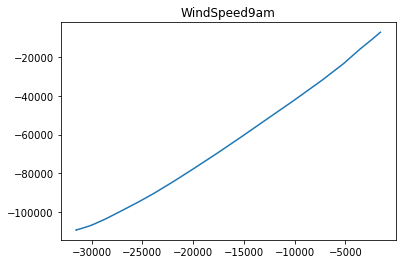

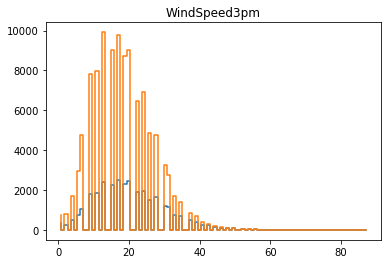

1868447103.0 WindSpeed3pm


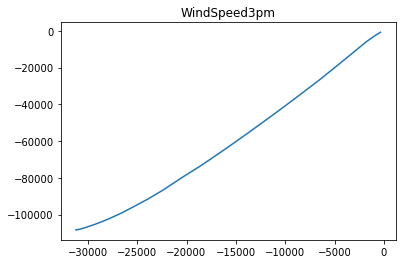

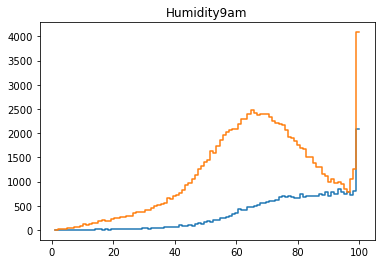

2342533038.5 Humidity9am


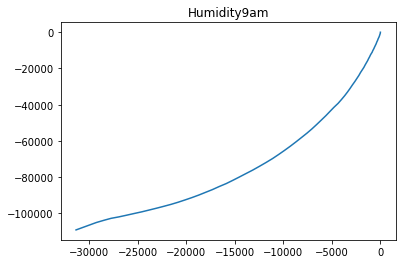

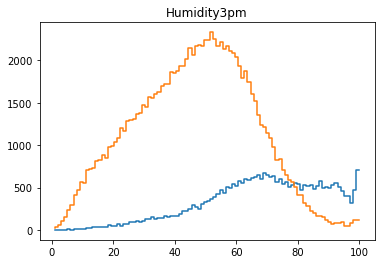

2659223458.0 Humidity3pm


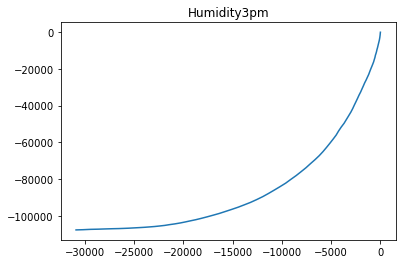

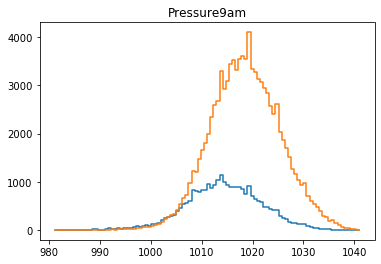

963908898.5 Pressure9am


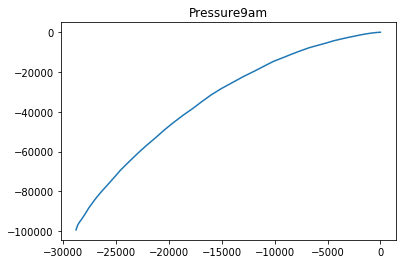

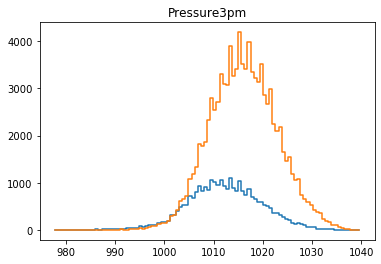

1003912210.5 Pressure3pm


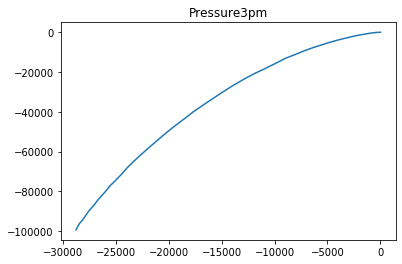

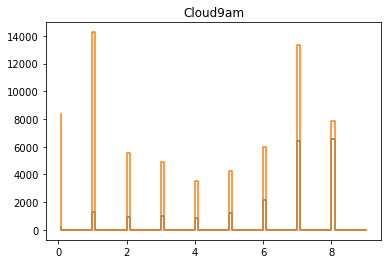

1006084581.5 Cloud9am


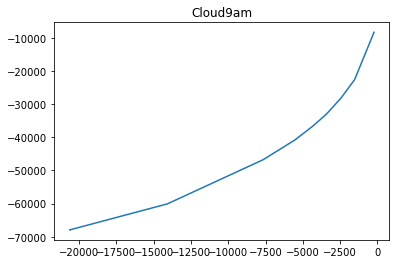

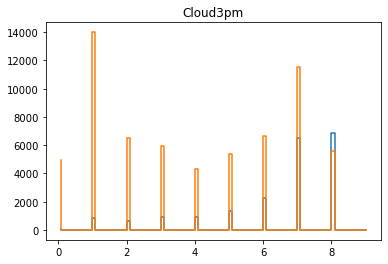

1004652479.0 Cloud3pm


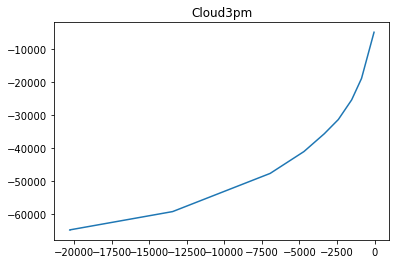

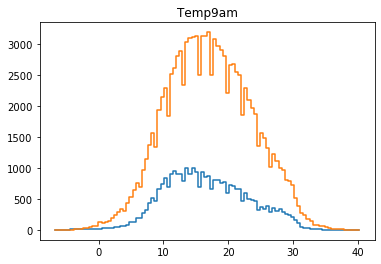

1659653398.0 Temp9am


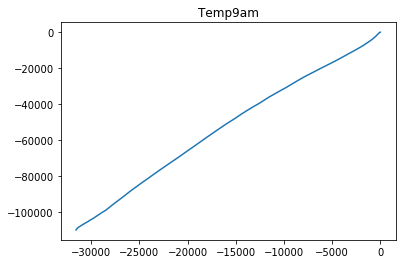

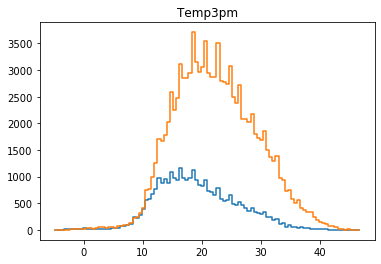

1235163629.5 Temp3pm


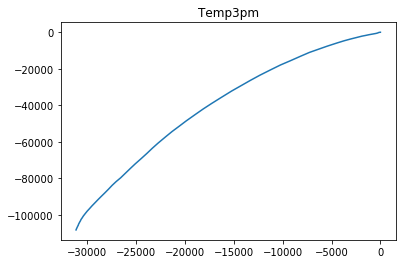

(('ROC area', 1235163629.5, 'Temp3pm'), 2726)

In [384]:
allROC(numdataX)

In [4]:
cleanall = data.notna()
datacleanall = (data.loc[cleanall.prod(axis=1)==1])
datacleanall.shape

(56420, 24)

In [5]:
numdata = datacleanall.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am','WindDir3pm', 'RISK_MM'], axis=1)

In [6]:
numdata

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5939,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
5940,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
5942,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
5943,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
5944,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
139109,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
139110,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
139111,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [78]:
data_nums = numdata.to_numpy()
m = data_nums.shape[0]     # number of data points
n = data_nums.shape[1]-1     # number of features
m_train = int(0.8 * m)
m_test = int(m- m_train)
data_nums = data_nums.astype(float)

## Covariance 

In [104]:
covariance = np.cov(data_nums.T)
corr = np.corrcoef(data_nums.T)

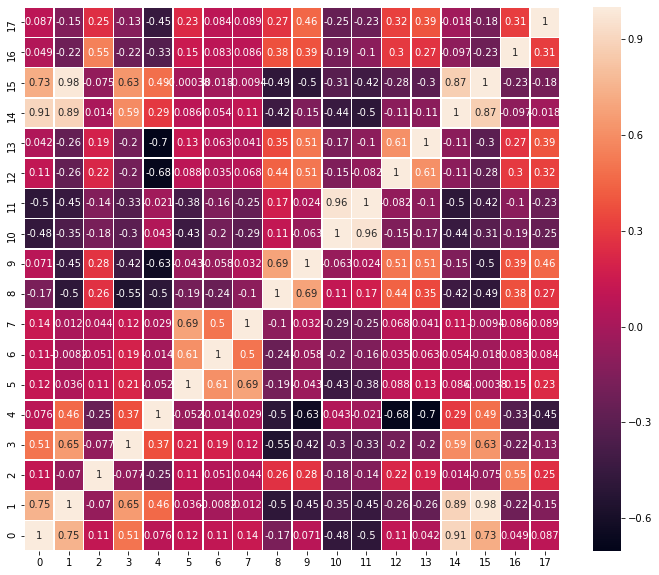

In [107]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.xlim(0,18)
plt.ylim(0,18)
plt.show()

## Define training and test set


### Randomize order of rows since they are ordered by date

In [9]:
data_nums_shuff = data_nums

In [10]:
np.random.shuffle(data_nums_shuff)

### Define training set

In [11]:
X_train = data_nums_shuff[0:m_train , 0:n]
Y_train = data_nums[0:m_train,-1].reshape((m_train,1))
X_train.shape, Y_train.shape

((45136, 17), (45136, 1))

### Define test set

In [12]:
X_test = data_nums_shuff[0:m_test , 0:n]
Y_test = data_nums[0:m_test,-1].reshape((m_test,1))
X_test.shape, Y_test.shape

((11284, 17), (11284, 1))

### Rescaling features

In [13]:
mean_X_train = (np.sum(X_train, axis=0)/(m_train)).reshape((1,n))
mean_X_test = (np.sum(X_test, axis=0)/(m_test)).reshape((1,n))

max_train = np.amax(X_train, axis=0)
min_train = np.amin(X_train, axis=0)

max_test = np.amax(X_test, axis=0)
min_test = np.amin(X_test, axis=0)

maxmin_train = (max_train - min_train).reshape((1,n))
maxmin_test = (max_test - min_test).reshape((1,n))

X_trainR = (X_train - mean_X_train)/maxmin_train
X_testR = (X_test - mean_X_test)/maxmin_test

X_trainR = X_trainR.astype(float) 
X_testR = X_testR.astype(float) 
Y_train = Y_train.astype(float)
Y_test = Y_test.astype(float)
Y_test.shape

(11284, 1)

### Sigmoid function

In [14]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s


In [15]:
def initial_theta(n):
    thetax = np.zeros((1,n))
    theta0=0
    return theta0, thetax

print(initial_theta(n))

(0, array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]]))


In [50]:
def cost(X, Y, theta0, thetax, m, lam):
    sig = sigmoid(theta0 + np.dot(X, thetax.T)).reshape((m,1))
    cost = - np.sum(Y*np.log(sig) + (1.0 - Y) * np.log(1.0- sig))/m
    reg = (lam/ (2.0 * m)) * np.sum(thetax[:]**2)
    return cost +reg

In [51]:
def cost_grad(X, Y, theta0, thetax, m, lam):
    sig = sigmoid(theta0 + np.dot(X, thetax.T)).reshape((m,1))
    #print(X.shape, thetax.T.shape)
   # print(sig.shape, Y.shape, X.T.shape)
    grad0 = np.sum((sig - Y), axis=0)/m
    gradx = np.dot(X.T, sig - Y)/m  + lam * thetax.T/m
    #grad = np.insert(gradx, 0, grad0)
    return grad0, gradx

In [66]:
def predict(theta0, thetax, X, m):   
    Y_prediction = np.ones((m,1)) 
    Y_predic_sig = np.ones((m,1)) 
    sig = sigmoid(theta0 + np.dot(X, thetax.T)).reshape((m,1))  
    for i in range(m):      
        Y_predic_sig[i,:] = sig[i,0]
        Y_prediction[i,:] = [1 if sig[i,0]> 0.5 else 0]
    assert(Y_prediction.shape == (m,1))
    return Y_prediction, Y_predic_sig


In [54]:
zz = theta_result[0]+ np.dot(X_trainR, theta_result[1:].T)
sigmoid(zz).shape

(45136,)

In [ ]:
thetax = initial_theta(n)[1]
theta0=initial_theta(n)[0]
#print(thetax.T)

#print(cost(X_trainR, Y_train, theta0, thetax, m_train, 0))

cost_history = np.zeros(3)
theta_history = np.zeros((3, n+1))

cost_grad(X_trainR, Y_train, theta0, thetax, m_train, 0.1)[1]



In [55]:
def gradD(X, Y, m, lam, alpha, iterations):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, n+1))
    np.shape(theta_history[1,1:n+1])
    theta0, thetax = initial_theta(n)
    for it in range(iterations):
        theta0n = theta0 -  alpha * cost_grad(X, Y, theta0, thetax, m, lam)[0].T
        thetaxn = thetax -  alpha * cost_grad(X, Y, theta0, thetax, m, lam)[1].T
        theta_history[it,0]=theta0n
        theta_history[it,1:n+1]=thetaxn
        cost_history[it]= cost(X, Y,  theta0n, thetaxn, m, lam)
        theta0 = theta0n
        thetax = thetaxn
        #print(it,cost(X, Y,  theta0n, thetaxn, m, lam))
    theta = np.insert(thetax, 0, theta0)
    return theta, theta_history, cost_history 

In [71]:
theta_result, theta_hist, cost_hist = gradD(X_trainR, Y_train, m_train, 1, 0.1, 6000)

<function matplotlib.pyplot.show(*args, **kw)>

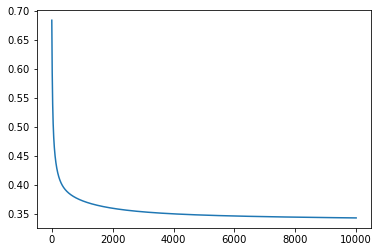

In [72]:
plt.plot(cost_hist)
plt.show

## Plot Bias and Pole Distribution

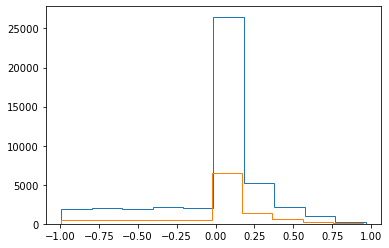

In [76]:
bias_train =  predict(theta_result[0], theta_result[1:], X_trainR, m_train)[1] -  Y_train
bias_test =  predict(theta_result[0], theta_result[1:], X_testR, m_test)[1] -  Y_test
plt.hist(bias_train, histtype = 'step')
plt.hist(bias_test, histtype = 'step')
plt.show()

In [69]:
def accuracy(theta0r, thetaxr, X, Y, m):
    Y_predict = predict(theta0r, thetaxr, X, m)[0]
    acc = 100 - np.mean(np.abs(Y_predict - Y)) * 100
    return acc

In [59]:
predict(theta_result[0], theta_result[1:], X_trainR, m_train) 

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [74]:
accuracy(theta_result[0], theta_result[1:], X_trainR, Y_train, m_train)

84.88346331088266

In [75]:
accuracy(theta_result[0], theta_result[1:], X_testR, Y_test, m_test)

84.8014888337469